#           Importing libraries for performing EDA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
a1=pd.read_csv('cust_segmentation_Data.csv')

In [4]:
a1.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
a1.drop(columns=['Customer Id'],inplace=True)

In [6]:
a1.shape

(850, 8)

In [7]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [8]:
a1.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

#             Data Visualization:Graphs

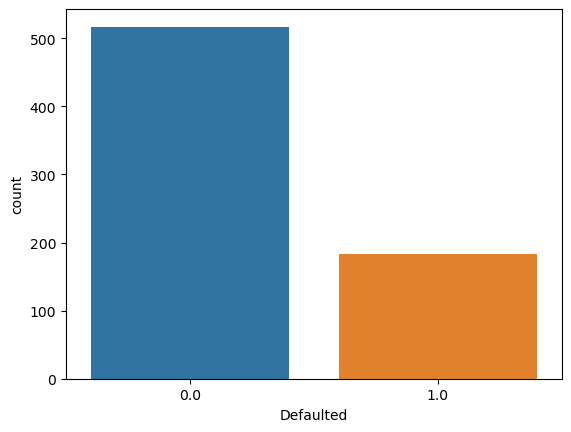

In [9]:
sns.countplot(x='Defaulted',data=a1)
plt.show()

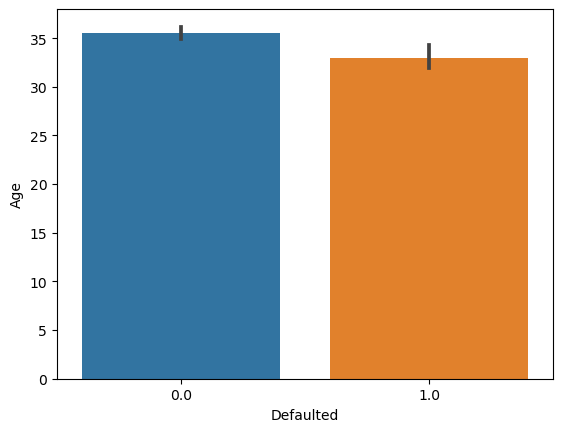

In [10]:
sns.barplot(x='Defaulted',y ='Age',data=a1)
plt.show()

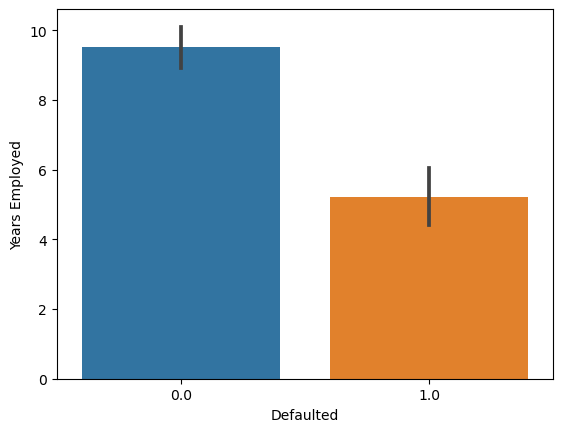

In [11]:
sns.barplot(x='Defaulted',y='Years Employed',data=a1)
plt.show()

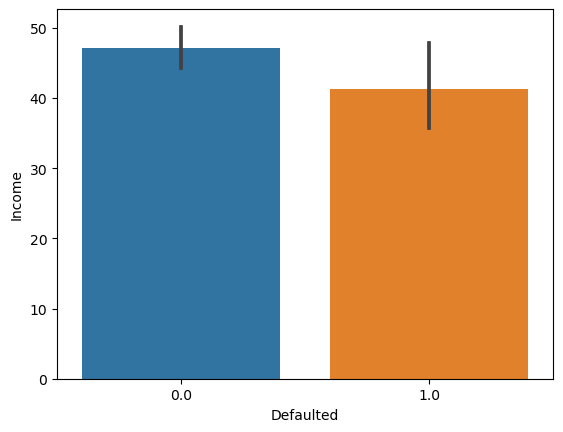

In [12]:
sns.barplot(x='Defaulted',y='Income',data=a1)
plt.show()

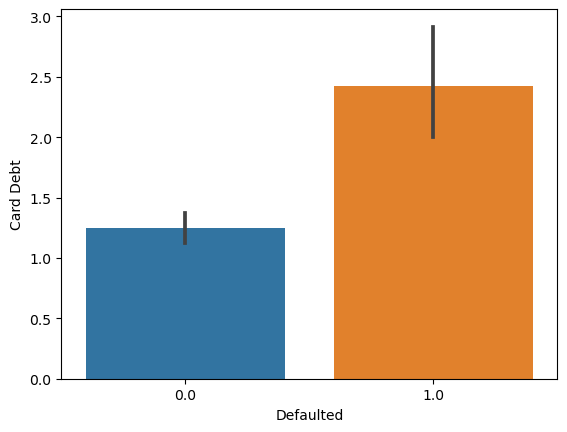

In [13]:
sns.barplot(x='Defaulted',y='Card Debt',data=a1)
plt.show()

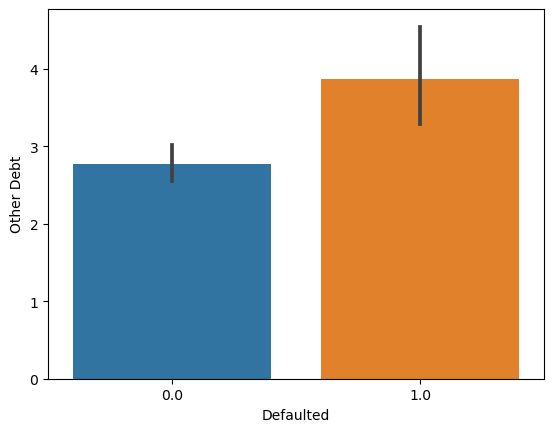

In [14]:
sns.barplot(x='Defaulted',y='Other Debt',data=a1)
plt.show()

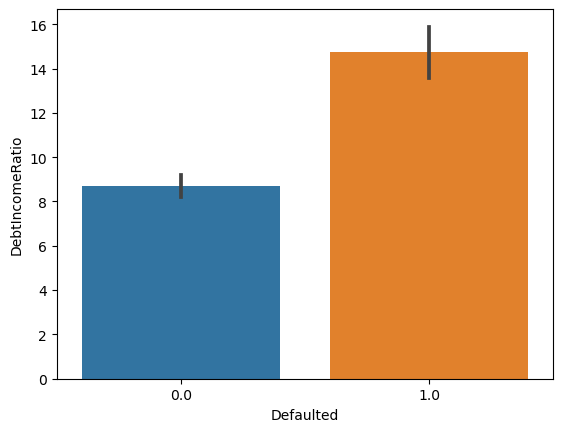

In [15]:
sns.barplot(x='Defaulted',y='DebtIncomeRatio',data=a1)
plt.show()

In [16]:
a1.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [17]:
a1.corr()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Age,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240
Edu,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053
Years Employed,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625
Income,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585
Card Debt,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971
Other Debt,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545
Defaulted,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000


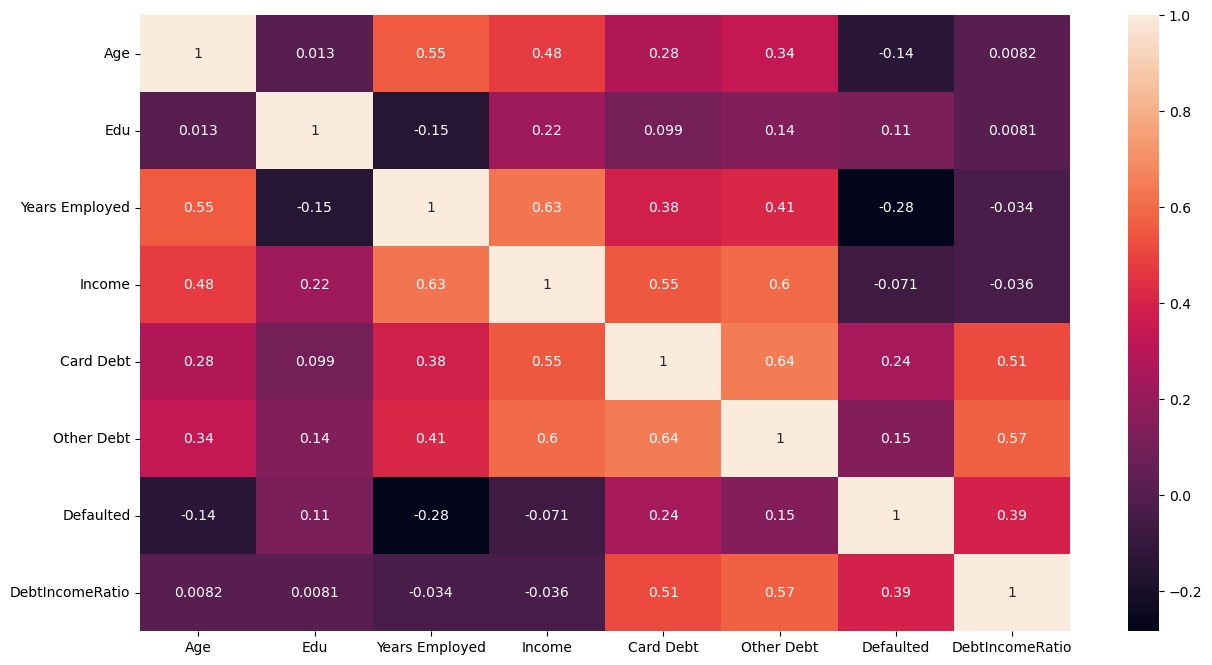

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(a1.corr(),annot=True)
plt.show()

# Graph and it's conclusion

1)In the given data the defaulters are less in number.

2)Age does not affect the defaulters.

3)Years of employment affect the defaulter in inverse proportion,if years of employment is less then there is more chance of being a defaulter.

4)Income also does not show great variation to defaulters.

5)If Card Debt is more then there is more possibility of being a defaulter.

6)If Other Debt is more then also there is more possibility of being a defaulter.

7)If Debt to Income ratio is more then there is more probabilty that customer could be defaulter.

8)Also the heatmap shows that Card Debt, Other Debt and Debt Income Ratio are highly correlated to Defaulter.It means that the if Card Debt,Other Debt and Debt Income Ratio are more then there is more probability the customer could be a defaulter,whereas income of customer does not affect of customer being a defaulter.

#            Filling the missing values

In [19]:
def defaulter(cols):
    Defaulted=cols[0]
    Years_Employed=cols[1]
    Card_Debt=cols[2]
    Other_Debt=cols[3]
    DebtIncomeRatio=cols[4]
    
    if pd.isnull(Defaulted):
        if Years_Employed<6 or Card_Debt>1.5 or Other_Debt>3 or DebtIncomeRatio>10:
            return 1
        else:
            return 0
    else:
        Defaulted

In [20]:
a1['Defaulted'].fillna(value=a1[['Defaulted','Years Employed','Card Debt','Other Debt','DebtIncomeRatio']].apply(defaulter,axis=1),inplace=True)

In [21]:
a1

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,1.0,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [22]:
a1.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

#            ML model deployment

In [23]:
a1.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


        Assigning the dependent, targeted features and independent features

In [24]:
X=a1.iloc[:,[0,1,2,3,4,5,7]].values
y=a1.iloc[:,[6]].values

      Splitting the data into train and test data

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

    Scaling the features.i.e. Standardization.

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#    Using Logistic Regression

    Importing the module

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

    Fitting the data

In [28]:
lg=LogisticRegression(random_state=0)
lg.fit(X_train,y_train)

LogisticRegression(random_state=0)

    Making the predictions

In [29]:
y_pred=lg.predict(X_test)

In [30]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE 0.5395181296365978


In [31]:
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))

Accuracy= 0.7089201877934272


#      Using Random Forest

    Importing module and fitting the dataset

In [32]:
from sklearn.ensemble import RandomForestClassifier
rgs=RandomForestClassifier(random_state=0)
rgs.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

    Making predictions

In [33]:
y_pre=rgs.predict(X_test)

In [34]:
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_pre)))

RMSE= 0.5650210848199205


In [35]:
print("Accuracy=",metrics.accuracy_score(y_test,y_pre))

Accuracy= 0.6807511737089202


#    Using K Nearest Neighbors

    Importing the module

In [36]:
from sklearn.neighbors import KNeighborsClassifier

    Fitting the dataset

In [37]:
cls=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cls.fit(X_train,y_train)

KNeighborsClassifier()

    Making predictions

In [38]:
y_prd=cls.predict(X_test)

In [39]:
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_prd)))

RMSE= 0.5608511305242494


In [40]:
print("Accuracy=",metrics.accuracy_score(y_test,y_prd))

Accuracy= 0.6854460093896714


Conclusion

1)All the main conclusions are drawn under the Graphs and it's conclusion section.

2)For prediction purspose, I have used three modules:-1)Logistic Regression 2)Random Forest and 3)K Nearest Neighbors. The outcome of which that Logistic Regression module gives the highest accuracy with 70.89% which i consider good and fit to make further predictions.